In [1]:
import pandas as pd 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
os.chdir("C:/Users/Lenovo/Downloads")

In [3]:
A=pd.read_csv("50_Startups.csv")

In [4]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
A.skew()

RND       0.164002
ADMIN    -0.489025
MKT      -0.046472
PROFIT    0.023291
dtype: float64

In [6]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,subplot,xlabel,ylabel
from seaborn import scatterplot

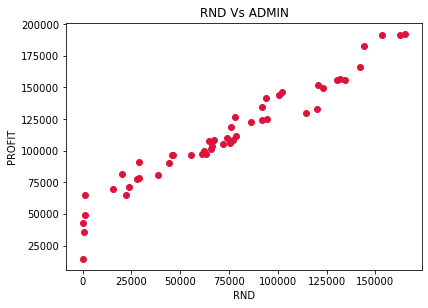

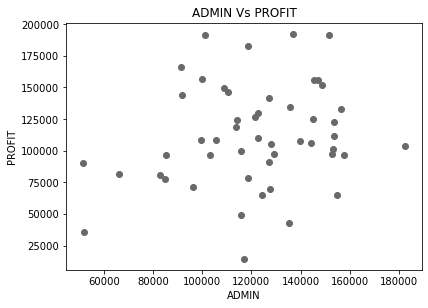

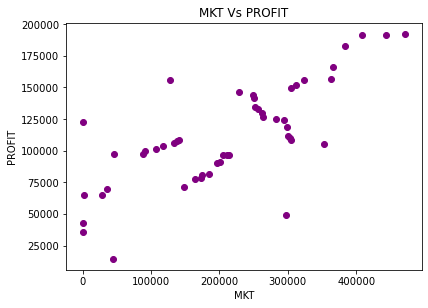

In [8]:
figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.scatter(A.RND,A.PROFIT,color="crimson")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("RND Vs ADMIN")
plt.show()
 
figure(figsize=(14,10))
plt.subplot(2,2,2)
plt.scatter(A.ADMIN,A.PROFIT,color="dimgrey")
plt.xlabel("ADMIN")
plt.ylabel("PROFIT")
plt.title("ADMIN Vs PROFIT")
plt.show()

figure(figsize=(14,10))
plt.subplot(2,2,3)
plt.scatter(A.MKT,A.PROFIT,color="purple")
plt.xlabel("MKT")
plt.ylabel("PROFIT")
plt.title("MKT Vs PROFIT")
plt.show()

<AxesSubplot:xlabel='MKT', ylabel='PROFIT'>

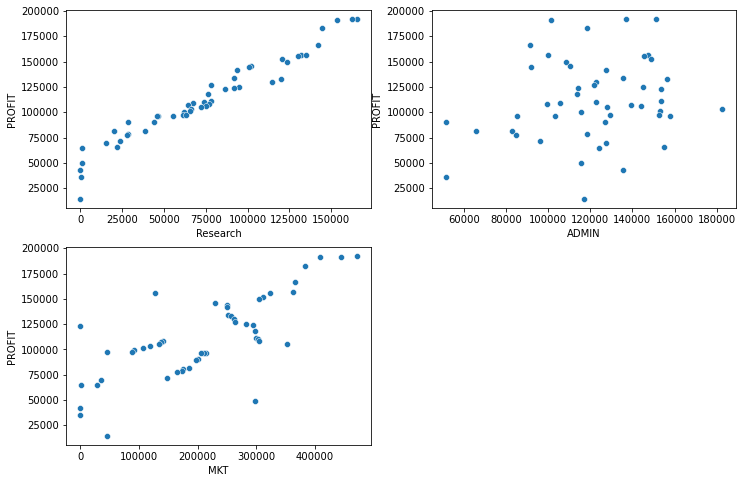

In [9]:
figure(figsize=(12,8))
subplot(2,2,1)
scatterplot(A.RND,A.PROFIT)
xlabel("Research")

subplot(2,2,2)
scatterplot(A.ADMIN,A.PROFIT)

subplot(2,2,3)
scatterplot(A.MKT,A.PROFIT)

In [10]:
from seaborn import boxplot
import seaborn as sb

<AxesSubplot:xlabel='STATE', ylabel='PROFIT'>

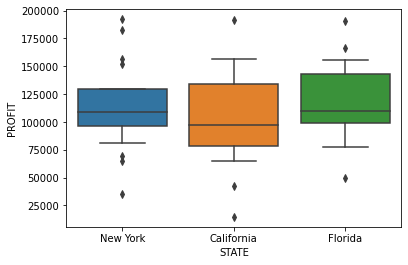

In [11]:
boxplot(A.STATE,A.PROFIT,whis=0.5)

# Find Outlier

In [12]:
import numpy as np

In [13]:
def find_outliers(pd,col):
    pd = pd[[col]]
    x = round(pd[col].mean(),2)
    pd['STD'] = np.abs(pd[col] - x)
    pd['STD3'] = pd[col].std()*3
    return pd[pd['STD'] > pd.STD3][[col]]

In [14]:
find_outliers(A,"PROFIT")

,PROFIT


In [15]:
find_outliers(A,"RND")

,RND


In [16]:
find_outliers(A,"ADMIN")

,ADMIN


In [17]:
find_outliers(A,"MKT")

,MKT


# Linear Regression

catgorical columns converted into o and 1 formate

In [18]:
X=pd.get_dummies(A.STATE)

In [19]:
X1=A[["RND","MKT","ADMIN"]]

In [20]:
X=X1.join(X)

In [21]:
Y=A[["PROFIT"]]

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [23]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [24]:
from sklearn.metrics import mean_absolute_error,explained_variance_score
print("MAE:",round(mean_absolute_error(ytest,pred),4))
print("EVS:",round(explained_variance_score(ytest,pred),4))

MAE: 5830.8379
EVS: 0.9556


In [25]:
Y = A[["PROFIT"]]
X = A[["RND","MKT","ADMIN"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
print("MAE:",round(mean_absolute_error(ytest,pred),2))
print("AdjRsquared:",round(explained_variance_score(ytest,pred),2))

MAE: 5784.32
AdjRsquared: 0.96


In [26]:
from statsmodels.api import OLS,add_constant
const=add_constant(xtrain)
OLS(ytrain,const).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     199.2
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.80e-22
Time:                        13:52:26   Log-Likelihood:                -421.72
No. Observations:                  40   AIC:                             851.4
Df Residuals:                      36   BIC:                             858.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.802e+04   7425.664      6.467      0.000     3.3e+04    6.31e+04
RND            0.8114      0.054     14.903      0.000       0.701       0.922
MKT            0.0303      0.021      1.479      0.148      -0.011       0.072
ADMIN         -0.0160      0.059     -0.273      0.786      -0.135       0.103
==============================================================================
Omnibus:                       11.886   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.854
Skew:                          -0.873   Prob(JB):                     0.000595
Kurtosis:                       5.421   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

ValueError: continuous is not supported